# **Covid**

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

# Upload the kaggle.json file
files.upload()

print("Kaggle.json uploaded successfully.")


Saving kaggle.json to kaggle.json
Kaggle.json uploaded successfully.


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research


Dataset URL: https://www.kaggle.com/datasets/sid321axn/covid-cxr-image-dataset-research
License(s): CC0-1.0
100% 571M/572M [00:29<00:00, 24.2MB/s]
100% 572M/572M [00:29<00:00, 20.1MB/s]


In [ ]:
!unzip /content/covid-cxr-image-dataset-research.zip

Archive:  /content/covid-cxr-image-dataset-research.zip
  inflating: COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models



In [ ]:
def create_dir_if_not_exists(path):
    if not os.path.exists(path):
        os.makedirs(path)

def split_and_copy_files(source_dir, dest_dirs, test_size=0.2, val_size=0.1):

    for class_name in os.listdir(source_dir):
        class_dir = os.path.join(source_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        files = os.listdir(class_dir)
        train_files, test_files = train_test_split(files, test_size=test_size, random_state=42)
        train_files, val_files = train_test_split(train_files, test_size=val_size / (1 - test_size), random_state=42)

        for phase, phase_files in zip(['train', 'test', 'val'], [train_files, test_files, val_files]):
            dest_class_dir = os.path.join(dest_dirs[phase], class_name)
            create_dir_if_not_exists(dest_class_dir)

            for file_name in phase_files:
                src_file = os.path.join(class_dir, file_name)
                dest_file = os.path.join(dest_class_dir, file_name)
                shutil.copy(src_file, dest_file)
                print(f"Copied {src_file} to {dest_file}")


In [ ]:
source_directory = '/content/COVID_IEEE'
destination_directories = {
        'train': 'train',
        'test': 'test',
        'val': 'validation'
    }

# Create destination directories if they do not exist
for key in destination_directories:
      create_dir_if_not_exists(destination_directories[key])

# Split and copy files
split_and_copy_files(source_directory, destination_directories)


Copied /content/COVID_IEEE/covid/38_A.jpg to train/covid/38_A.jpg
Copied /content/COVID_IEEE/covid/ciaa199.pdf-001-b.png to train/covid/ciaa199.pdf-001-b.png
Copied /content/COVID_IEEE/covid/EUNK-sHWoAAttJB.jfif to train/covid/EUNK-sHWoAAttJB.jfif
Copied /content/COVID_IEEE/covid/covid1900249.png to train/covid/covid1900249.png
Copied /content/COVID_IEEE/covid/covid1900147.png to train/covid/covid1900147.png
Copied /content/COVID_IEEE/covid/EUR2CTsWoAAo4O9.jfif to train/covid/EUR2CTsWoAAo4O9.jfif
Copied /content/COVID_IEEE/covid/EUNUghfXkAM7VHk.jfif to train/covid/EUNUghfXkAM7VHk.jfif
Copied /content/COVID_IEEE/covid/covid1900653.png to train/covid/covid1900653.png
Copied /content/COVID_IEEE/covid/EUNRcbKXQAAAThb.jfif to train/covid/EUNRcbKXQAAAThb.jfif
Copied /content/COVID_IEEE/covid/case42_Xray_1.jpeg to train/covid/case42_Xray_1.jpeg
Copied /content/COVID_IEEE/covid/paving.jpg to train/covid/paving.jpg
Copied /content/COVID_IEEE/covid/EUNJ_q6WsAALXas.jfif to train/covid/EUNJ_q6WsAA

## **continue**

In [ ]:
# Define directory paths
base_dir = '/content'
train_dir = f'{base_dir}/train'
validation_dir = f'{base_dir}/validation'
test_dir = f'{base_dir}/test'

# Image parameters
IMG_HEIGHT = 224  # or the target height for your CNN
IMG_WIDTH = 224   # or the target width for your CNN
BATCH_SIZE = 32


In [ ]:


# Preprocessing for training, validation, and test data (only rescaling)
image_generator = ImageDataGenerator(rescale=1.0/255)

# Create data generators
train_data_gen = image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical'
)

validation_data_gen = image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical'
)

test_data_gen = image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical'
)

# Display class indices
print(train_data_gen.class_indices)


Found 1190 images belonging to 3 classes.
Found 172 images belonging to 3 classes.
Found 346 images belonging to 3 classes.
{'covid': 0, 'normal': 1, 'virus': 2}


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, BatchNormalization,  Dropout, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 26, 26, 128)      

In [ ]:
# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // BATCH_SIZE,
    epochs=10,
    validation_data=validation_data_gen,
    validation_steps=validation_data_gen.samples // BATCH_SIZE
)


Epoch 1/10
37/37 [==============================] - 21s 507ms/step - loss: 1.0449 - accuracy: 0.6442 - val_loss: 0.6498 - val_accuracy: 0.8000
Epoch 2/10
37/37 [==============================] - 18s 486ms/step - loss: 0.3641 - accuracy: 0.8826 - val_loss: 0.3605 - val_accuracy: 0.8750
Epoch 3/10
37/37 [==============================] - 18s 490ms/step - loss: 0.2067 - accuracy: 0.9344 - val_loss: 0.2692 - val_accuracy: 0.9375
Epoch 4/10
37/37 [==============================] - 19s 510ms/step - loss: 0.1585 - accuracy: 0.9421 - val_loss: 0.4576 - val_accuracy: 0.8625
Epoch 5/10
37/37 [==============================] - 17s 471ms/step - loss: 0.1495 - accuracy: 0.9465 - val_loss: 0.3427 - val_accuracy: 0.9250
Epoch 6/10
37/37 [==============================] - 18s 503ms/step - loss: 0.0719 - accuracy: 0.9758 - val_loss: 0.3616 - val_accuracy: 0.9438
Epoch 7/10
37/37 [==============================] - 18s 471ms/step - loss: 0.0545 - accuracy: 0.9810 - val_loss: 0.3291 - val_accuracy: 0.9375

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data_gen, steps=test_data_gen.samples // BATCH_SIZE)
print(f'Test accuracy: {test_acc:.2f}')


10/10 [==============================] - 5s 475ms/step - loss: 0.2269 - accuracy: 0.9406
Test accuracy: 0.94


In [ ]:
import numpy as np

# Generate predictions for the test and validation datasets
validation_steps = np.ceil(validation_data_gen.samples / BATCH_SIZE).astype(int)
test_steps = np.ceil(test_data_gen.samples / BATCH_SIZE).astype(int)

# Predicting on validation and test data
validation_predictions = model.predict(validation_data_gen, steps=validation_steps)
test_predictions = model.predict(test_data_gen, steps=test_steps)

# Convert predictions from probabilities to class labels
validation_predicted_classes = np.argmax(validation_predictions, axis=1)
test_predicted_classes = np.argmax(test_predictions, axis=1)

# Get true labels from the data generators
validation_true_classes = validation_data_gen.classes[:len(validation_predicted_classes)]
test_true_classes = test_data_gen.classes[:len(test_predicted_classes)]


11/11 [==============================] - 4s 380ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix for validation and test data
validation_cm = confusion_matrix(validation_true_classes, validation_predicted_classes)
test_cm = confusion_matrix(test_true_classes, test_predicted_classes)

# Classification report
validation_classification_report = classification_report(validation_true_classes, validation_predicted_classes)
test_classification_report = classification_report(test_true_classes, test_predicted_classes)

print("Validation Classification Report:\n", validation_classification_report)
print("Test Classification Report:\n", test_classification_report)


Validation Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.28      0.27        43
           1       0.46      0.46      0.46        67
           2       0.37      0.35      0.36        62

    accuracy                           0.38       172
   macro avg       0.37      0.37      0.37       172
weighted avg       0.38      0.38      0.38       172

Test Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.24      0.23        88
           1       0.38      0.40      0.39       134
           2       0.33      0.31      0.32       124

    accuracy                           0.32       346
   macro avg       0.31      0.31      0.31       346
weighted avg       0.32      0.32      0.32       346



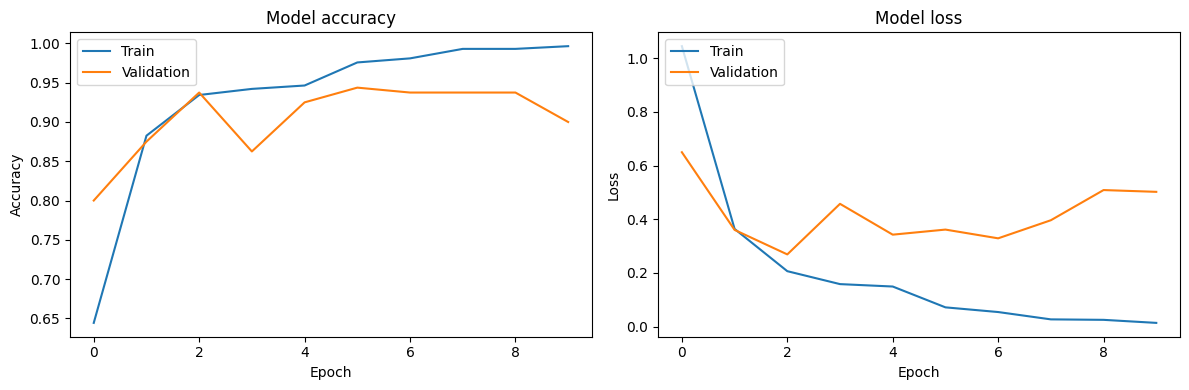

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
